# Author : Megha Roy

## Task 2: Prediction using Unsupervised ML

### Loading data and necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("Iris.csv", index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Exploratory Data Analysis

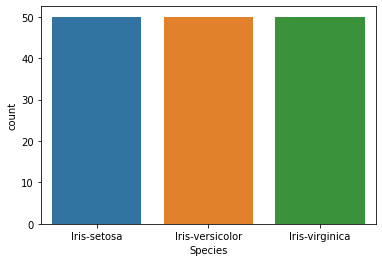

In [8]:
sns.countplot(x="Species",data=df)

This is a perfectly balanced dataset.

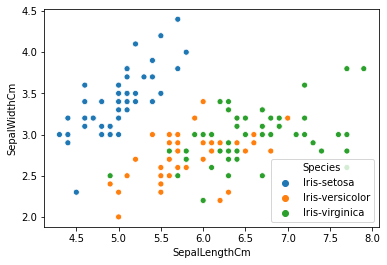

In [9]:
sns.scatterplot(data=df, x="SepalLengthCm", y="SepalWidthCm",hue="Species")

Iris-setosa looks more distinguishable from the others in the above graph

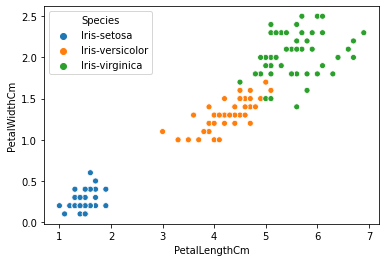

In [10]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm",hue="Species")

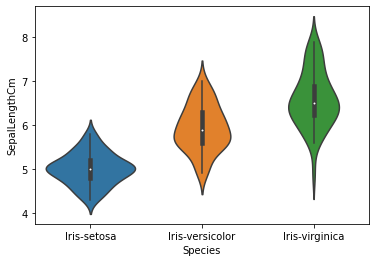

In [11]:
sns.violinplot('Species','SepalLengthCm',data=df)

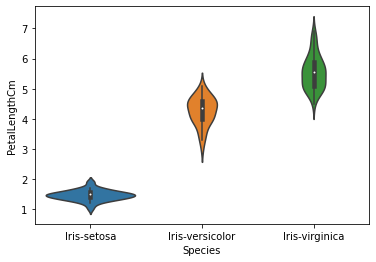

In [12]:
sns.violinplot('Species','PetalLengthCm',data=df)

Iris-virginica has longer sepals and petals implying that it is the largest flower.

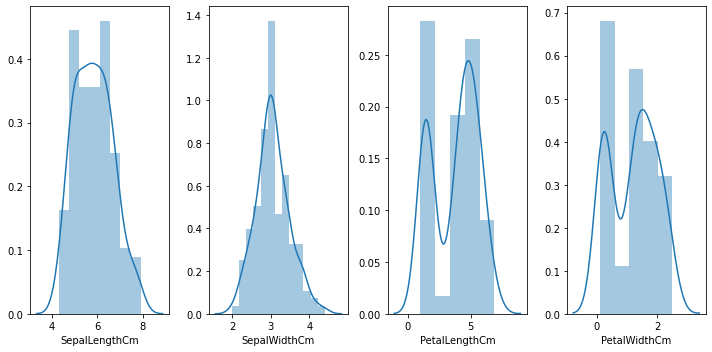

In [13]:
df1=df.drop('Species', axis=1, inplace=True)
fig, axes = plt.subplots(ncols=len(df.columns), figsize=(10,5))
for ax, col in zip(axes, df.columns):
    sns.distplot(df[col], ax=ax)
    plt.tight_layout() 
plt.show()

Sepal length and width follows normal distribution

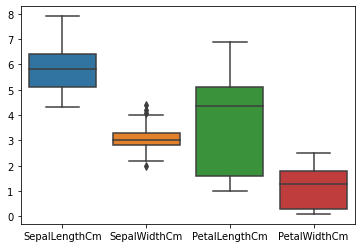

In [14]:
sns.boxplot(data=df)

Sepal width has outliers in it.

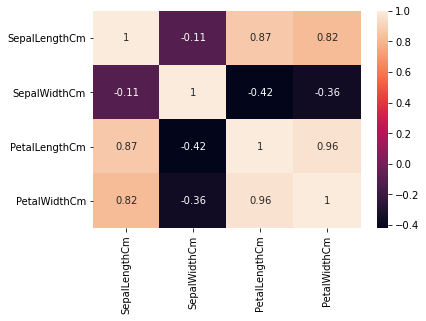

In [15]:
sns.heatmap(df.corr(),annot=True)

There is pretty high correlation between variables.

In [16]:
y = df.iloc[:,   -1].values
Y=np.array(y)

### K-means Clustering

#### K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. A cluster refers to a collection of data points aggregated together because of certain similarities. A centroid is the imaginary or real location representing the center of the cluster. K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In [17]:
X=df.iloc[:,[0,1,2,3]]

#### FINDING NO. OF CLUSTERS BY ELBOW METHOD.

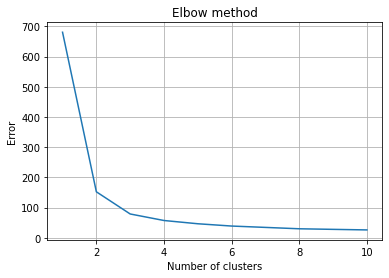

In [18]:
Error =[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
    
plt.plot(range(1,11),Error)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Error")
plt.grid()
plt.show()

#### The optimum clusters is where the elbow occurs. So the no. of clusters is 3.

### Model Building

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)  
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [20]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### Cluster Plotting

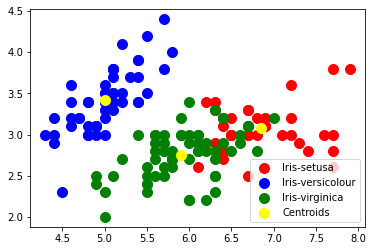

In [21]:
X = np.array(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setusa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

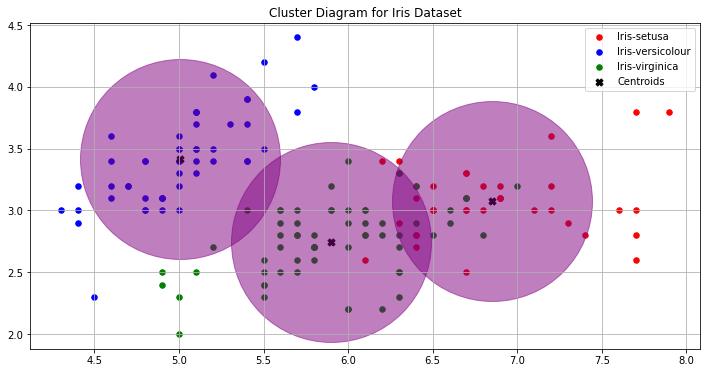

In [22]:
X = np.array(X)
plt.figure(figsize=(12,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Iris-setusa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids',marker="X")
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:,1], s = 40000, c = 'purple', alpha=0.5, marker="o")
plt.title("Cluster Diagram for Iris Dataset")
plt.grid()
plt.legend()
plt.show()
